In [23]:
from fact.analysis import li_ma_significance
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize_scalar

%matplotlib inline

In [16]:
n_on = 100
n_off = 100
alpha = 0.2

li_ma_significance(n_on, n_off * alpha, alpha=1), li_ma_significance(n_on, n_off, alpha=alpha)

(7.630244636083023, 10.842385945004162)

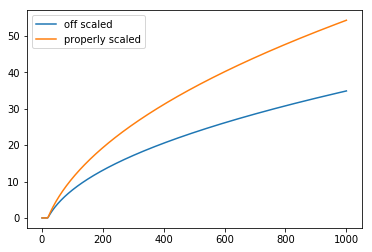

In [19]:
ns = np.linspace(1, 1000, 500)
ls = li_ma_significance(ns, n_off * alpha, alpha=1)
plt.plot(ns, ls, label='off scaled')

ls_correct = li_ma_significance(ns, n_off, alpha=alpha)
plt.plot(ns, ls_correct, label='properly scaled')

plt.legend()

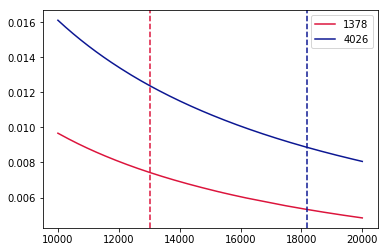

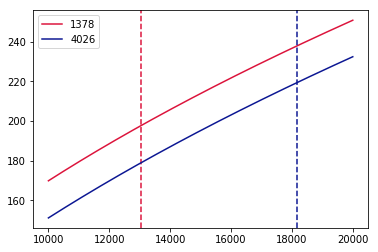

In [46]:
def target(scaling_factor, n_signal, n_background, alpha=0.2, sigma=5):
    n_on = n_background*alpha + n_signal * scaling_factor
    n_off = n_background

    significance = li_ma_significance(n_on, n_off, alpha=alpha)
    return (5 - significance)**2



# 18177.961872825043 4026.031501111061

def plot_significance(n_background, n_signal, color='xkcd:purple'):
    ns = np.linspace(10000, 20000, 200)
    s = []
    for n in ns:
        s.append(li_ma_significance(n + n_background*0.2, n_background, alpha=0.2))

    plt.plot(ns, s, label=f'{n_background}', color=color)
    plt.axvline(x=n_signal, ls='--', color=color)


def plot_curve(n_background, n_signal, color='xkcd:purple'):
    ns = np.linspace(10000, 20000, 200)
    s = []
    for n in ns:
        result = minimize_scalar(target, args=(n, n_background, alpha), bounds=(0, 100), method='bounded')
        s.append(result.x)
    plt.plot(ns, s, label=f'{n_background}', color=color)
    plt.axvline(x=n_signal, ls='--', color=color)

plot_curve(n_background=1378, n_signal=13035, color='crimson')
plot_curve(n_background=4026, n_signal=18177, color='xkcd:royal')
    
plt.legend()

plt.figure()
plot_significance(n_background=1378, n_signal=13035, color='crimson')
plot_significance(n_background=4026, n_signal=18177, color='xkcd:royal')
plt.legend()

# ns = np.linspace(15000, 20000, 200)
# s = []
# for n_signal in ns:
#     n_background = 4026
#     s.append(li_ma_significance(n_signal + n_background*0.2, n_background, alpha=0.2))
# plt.plot(ns, s)